In [1]:
from src.neighborhood_message_passing import NeighborhoodMessagePassing

import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

plt.rc('text', usetex=True)
plt.rc('font', size=12)
%matplotlib inline

In [2]:
g = nx.karate_club_graph()
r = 1
infection_rate = 0.2
t_max = 50
M = 10

## Influence maximization

In [5]:
n = len(g)
seeds = [0,10]

# set s and v
s = np.zeros(n)
s[seeds] = 1
# no vaccinated nodes
v = np.zeros(n)

NMP = NeighborhoodMessagePassing(g, r, infection_rate, t_max, 
                                    M=M, v = v, verbose=True, temporal = False)

NMP.neighborhood_message_passing(s)
marginals = NMP.marginals

Constructing neighborhoods for N_i excluding N_j.


100%|██████████| 34/34 [00:00<00:00, 7599.19it/s]


Sampling neighborhoods for marginal calculations.


100%|██████████| 34/34 [00:00<00:00, 548.32it/s]


Sampling neighborhoods for N_i excluding N_j.


 37%|███▋      | 18/49 [00:01<00:02, 11.37it/s]


In [6]:
# extract the expected outbreak size
pi_t = np.sum(marginals, axis=0)
print("Influence maximization",pi_t)

Influence maximization [ 2.          6.38555709  7.85563275  9.22873273  9.86472062 10.09532042
 10.19641203 10.26083423 10.29414861 10.3081615  10.31444231 10.31781297
 10.31955245 10.32034549 10.32071036 10.32089426 10.32098709 10.32103108
 10.32105176 10.3210619 ]


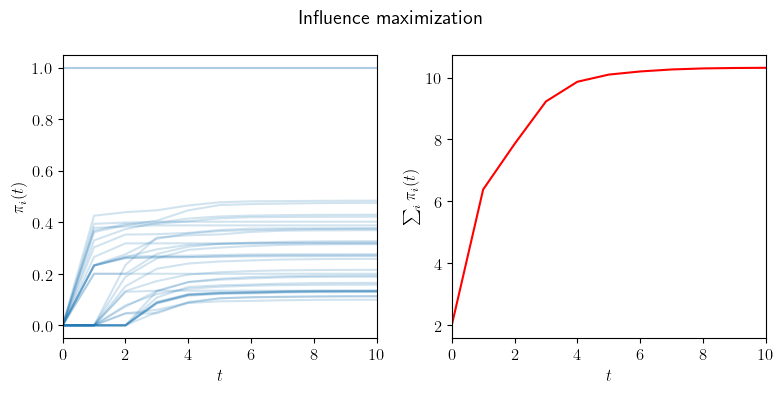

In [7]:
fig, axes = plt.subplots(1,2, figsize=(8,4))

ax = axes[0]
ax.plot(marginals.T,color = 'C0', alpha = 0.2)
ax.set(xlabel=r'$t$', ylabel= r'$\pi_i(t)$',xlim=[0,10])

ax = axes[1]
ax.plot(pi_t, color = 'red')
ax.set(xlabel=r'$t$', ylabel= r'$\sum_i \pi_i(t)$')
ax.set(xlim=[0,10])
plt.suptitle("Influence maximization")
plt.tight_layout()

## Vaccination

In [9]:
n = len(g)
seeds = [0,10]

# set s and v
v = np.zeros(n)
for i in seeds:
    v[i] = 1
s = np.zeros(n)
s += 1/(n-len(seeds))
s[list(seeds)] = 0

# run NMP
NMP = NeighborhoodMessagePassing(g, r, infection_rate, t_max, M=M, v = v, temporal = False, verbose=False)
NMP.neighborhood_message_passing(s)
marginals = NMP.marginals

In [10]:
# extract the expected outbreak size
pi_t = np.sum(marginals, axis=0)
print("Vaccination",pi_t)

Vaccination [1.         1.83329196 2.67383316 2.99528451 3.186885   3.28239821
 3.34562472 3.37644524 3.39297595 3.401669   3.40677501 3.40946582
 3.41089504 3.41165823 3.4120866  3.41231751 3.4124409  3.41250716
 3.41254362 3.41256339 3.41257402]


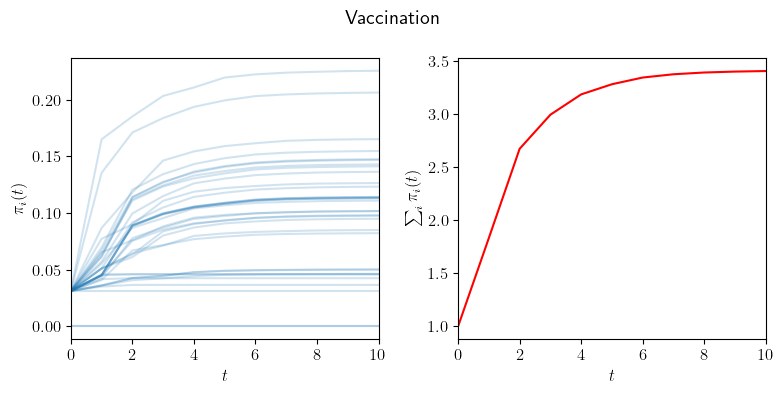

In [11]:
fig, axes = plt.subplots(1,2, figsize=(8,4))

ax = axes[0]
ax.plot(marginals.T,color = 'C0', alpha = 0.2)
ax.set(xlabel=r'$t$', ylabel= r'$\pi_i(t)$',xlim=[0,10])

ax = axes[1]
ax.plot(pi_t, color = 'red')
ax.set(xlabel=r'$t$', ylabel= r'$\sum_i \pi_i(t)$')
ax.set(xlim=[0,10])
plt.suptitle("Vaccination")
plt.tight_layout()

## Sentinel Surveillance


In [12]:
n = len(g)
seeds = [0,10]

# set s and v
v = np.zeros(n)
for i in seeds:
    v[i] = 1
s = np.zeros(n)
s += 1/n

NMP = NeighborhoodMessagePassing(g, r, infection_rate, t_max, M=M, v = v, verbose=False, temporal = True)
NMP.neighborhood_message_passing(s,track_vaccinated=True)
marginals = NMP.marginals

In [13]:
marginals_S = marginals[seeds,:]
pi_S_t = 1 - np.prod(1-marginals_S, axis=0)
print("Sentinel surveillance",pi_S_t)

Sentinel surveillance [0.05795848 0.18983966 0.2667221  0.30483206 0.33128029 0.35285566
 0.36641861 0.37589458 0.38257578 0.38708034 0.39014273 0.39222908
 0.39364993 0.39461641 0.39527555 0.39572406 0.39602949 0.39623756
 0.39637939 0.39647606 0.39654193 0.39658683 0.39661741 0.39663826
 0.39665246 0.39666214 0.39666874 0.39667323 0.3966763  0.39667838
 0.39667981 0.39668078 0.39668144]


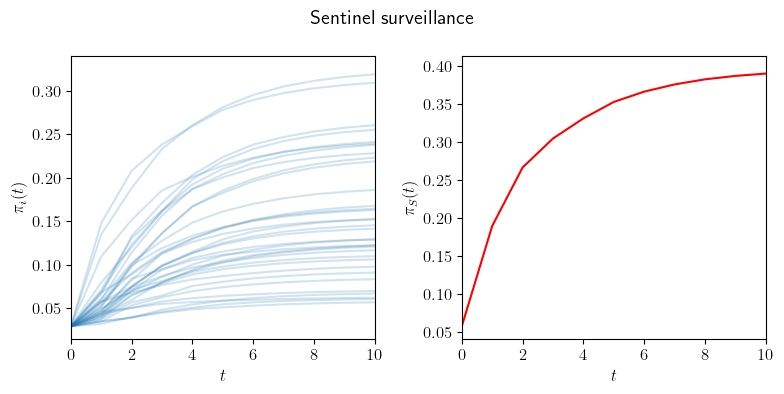

In [14]:
fig, axes = plt.subplots(1,2, figsize=(8,4))

ax = axes[0]
ax.plot(marginals.T,color = 'C0', alpha = 0.2)
ax.set(xlabel=r'$t$', ylabel= r'$\pi_i(t)$',xlim=[0,10])

ax = axes[1]
ax.plot(pi_S_t, color = 'red')
ax.set(xlabel=r'$t$', ylabel= r'$\pi_S(t)$')
ax.set(xlim=[0,10])
plt.suptitle("Sentinel surveillance")
plt.tight_layout()

# Varying hyperparameters

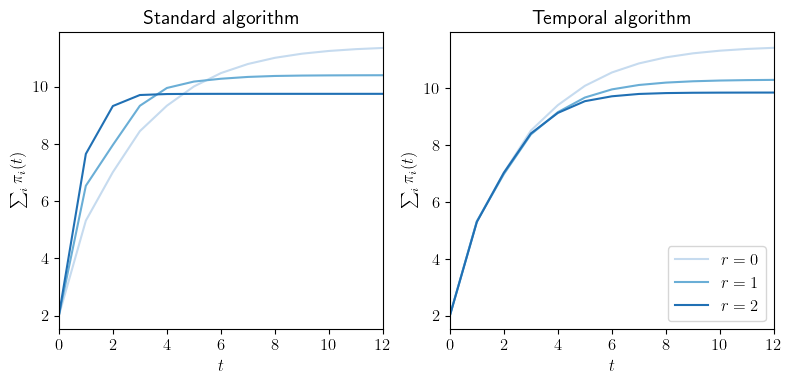

In [17]:
fig, axes = plt.subplots(1,2, figsize=(8,4))

for r in [0,1,2]:
    
    n = len(g)
    seeds = [0,10]

    # set s and v
    s = np.zeros(n)
    s[seeds] = 1
    # no vaccinated nodes
    v = np.zeros(n)

    NMP = NeighborhoodMessagePassing(g, r, infection_rate, t_max, 
                                        M=M, v = v, verbose=False, temporal = False)

    NMP.neighborhood_message_passing(s)
    marginals = NMP.marginals
    pi_t = np.sum(marginals, axis=0)
    if len(pi_t) < 16:
        pi_t = np.concatenate([pi_t,[pi_t[-1]]*(16-len(pi_t))])

    axes[0].plot(pi_t, label = r'$r = {}$'.format(r), color=plt.get_cmap('Blues')((r+1)/4))

    NMP = NeighborhoodMessagePassing(g, r, infection_rate, t_max, 
                                        M=200, v = v, verbose=False, temporal = True)

    NMP.neighborhood_message_passing(s)
    marginals = NMP.marginals
    pi_t = np.sum(marginals, axis=0)
    if len(pi_t) < 15:
        pi_t = np.concatenate([pi_t,[pi_t[-1]]*(15-len(pi_t))])

    axes[1].plot(pi_t, label = r'$r = {}$'.format(r), color=plt.get_cmap('Blues')((r+1)/4))

for ax in axes:
    ax.set(xlim=[0,12], xlabel=r'$t$', ylabel= r'$\sum_i \pi_i(t)$')

axes[0].set_title("Standard algorithm")
axes[1].set_title("Temporal algorithm")

ax.legend()
plt.tight_layout()